# Coronavirus Project Group B

Group B: India, Peru, EEUU, France and Spain:

Kapil
María
Juan

---------------------

## 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import sys 
import os 
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_path = os.path.dirname(os.getcwd())
sys.path.append(root_path)
sys.path = list(set(sys.path)) 

In [3]:
import src.utils.visualization_tb as vis 
import src.utils.folders_tb as fol
import src.utils.mining_data_tb as mng
import src.utils.apis_tb as api

## 2.Data Wrangling

In [4]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv") 
data.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.498  
1                         0.5            64.83                    0.498  
2                         0.5            64.83                    0.498  
3                         0.5            64.83                    0.498  
4                         0.5            64.83                    0.498  

[5 rows x 55 columns]

In [5]:
data.shape

(62047, 55)

## 3. Data Cleaning

In [6]:
#Selecting assigned group B countries
data_sc = mng.country_select(df=data, count_list=['India', 'Peru', 'United States', 'France', 'Spain'])
data_sc.head()

iso_code continent location        date  total_cases  new_cases  \
25011      IND      Asia    India  2020-01-30          1.0        1.0   
25012      IND      Asia    India  2020-01-31          1.0        0.0   
25013      IND      Asia    India  2020-02-01          1.0        0.0   
25014      IND      Asia    India  2020-02-02          2.0        1.0   
25015      IND      Asia    India  2020-02-03          3.0        1.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
25011                 NaN           NaN         NaN                  NaN  ...   
25012                 NaN           NaN         NaN                  NaN  ...   
25013                 NaN           NaN         NaN                  NaN  ...   
25014                 NaN           NaN         NaN                  NaN  ...   
25015                 NaN           NaN         NaN                  NaN  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
25011        6426.674             21.2                 282.28   
25012        6426.674             21.2                 282.28   
25013        6426.674             21.2                 282.28   
25014        6426.674             21.2                 282.28   
25015        6426.674             21.2                 282.28   

       diabetes_prevalence  female_smokers  male_smokers  \
25011                10.39             1.9          20.6   
25012                10.39             1.9          20.6   
25013                10.39             1.9          20.6   
25014                10.39             1.9          20.6   
25015                10.39             1.9          20.6   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
25011                   59.55                        0.53            69.66   
25012                   59.55                        0.53            69.66   
25013                   59.55                        0.53            69.66   
25014                   59.55                        0.53            69.66   
25015                   59.55                        0.53            69.66   

       human_development_index  
25011                     0.64  
25012                     0.64  
25013                     0.64  
25014                     0.64  
25015                     0.64  

[5 rows x 55 columns]

In [7]:
#Percentage of missing values.  This will help us decide which columns we have selected.
miss = data_sc.isnull().sum() * 100 / len(data_sc)
miss.sort_values()

iso_code                                  0.000000
hospital_beds_per_thousand                0.000000
female_smokers                            0.000000
diabetes_prevalence                       0.000000
cardiovasc_death_rate                     0.000000
gdp_per_capita                            0.000000
aged_70_older                             0.000000
aged_65_older                             0.000000
median_age                                0.000000
population_density                        0.000000
population                                0.000000
life_expectancy                           0.000000
human_development_index                   0.000000
total_cases_per_million                   0.000000
continent                                 0.000000
location                                  0.000000
date                                      0.000000
total_cases                               0.000000
new_cases                                 0.056148
new_cases_per_million          

In [8]:
# Function used to see the different values inside each column. If there were only five values, that column was not included. 
data_sc["aged_65_older"].unique()

array([ 5.989,  7.151, 15.413, 19.718, 19.436])

In [9]:
#Selecting the columns to analyse.
data_final = data_sc[["iso_code","continent","location","date","total_cases","total_cases_per_million","new_cases_smoothed","new_cases_smoothed_per_million","new_deaths_smoothed","new_deaths_smoothed_per_million","total_deaths","total_deaths_per_million","life_expectancy","stringency_index","new_deaths"]]
data_final

iso_code continent location        date  total_cases  \
25011      IND      Asia    India  2020-01-30          1.0   
25012      IND      Asia    India  2020-01-31          1.0   
25013      IND      Asia    India  2020-02-01          1.0   
25014      IND      Asia    India  2020-02-02          2.0   
25015      IND      Asia    India  2020-02-03          3.0   
...        ...       ...      ...         ...          ...   
52329      ESP    Europe    Spain  2021-01-20    2412318.0   
52330      ESP    Europe    Spain  2021-01-21    2456675.0   
52331      ESP    Europe    Spain  2021-01-22    2499560.0   
52332      ESP    Europe    Spain  2021-01-23    2499560.0   
52333      ESP    Europe    Spain  2021-01-24    2499560.0   

       total_cases_per_million  new_cases_smoothed  \
25011                    0.001                 NaN   
25012                    0.001                 NaN   
25013                    0.001                 NaN   
25014                    0.001                 NaN   
25015                    0.002                 NaN   
...                        ...                 ...   
52329                51595.106           33747.000   
52330                52543.822           34958.286   
52331                53461.054           35342.286   
52332                53461.054           35342.286   
52333                53461.054           35342.286   

       new_cases_smoothed_per_million  new_deaths_smoothed  \
25011                             NaN                  NaN   
25012                             NaN                  NaN   
25013                             NaN                  NaN   
25014                             NaN                  NaN   
25015                             NaN                  NaN   
...                               ...                  ...   
52329                         721.787              251.286   
52330                         747.694              280.286   
52331                         755.907              303.857   
52332                         755.907              303.857   
52333                         755.907              303.857   

       new_deaths_smoothed_per_million  total_deaths  \
25011                              NaN           NaN   
25012                              NaN           NaN   
25013                              NaN           NaN   
25014                              NaN           NaN   
25015                              NaN           NaN   
...                                ...           ...   
52329                            5.375       54637.0   
52330                            5.995       55041.0   
52331                            6.499       55441.0   
52332                            6.499       55441.0   
52333                            6.499       55441.0   

       total_deaths_per_million  life_expectancy  stringency_index  new_deaths  
25011                       NaN            69.66             10.19         NaN  
25012                       NaN            69.66             10.19         NaN  
25013                       NaN            69.66             10.19         NaN  
25014                       NaN            69.66             10.19         NaN  
25015                       NaN            69.66             10.19         NaN  
...                         ...              ...               ...         ...  
52329                  1168.586            83.56             71.30       464.0  
52330                  1177.227            83.56               NaN       404.0  
52331                  1185.782            83.56               NaN       400.0  
52332                  1185.782            83.56               NaN         0.0  
52333                  1185.782            83.56               NaN         0.0  

[1781 rows x 15 columns]

In [10]:
#Changing date column to datatime
mng.changing_dates(df=data_final,name_column="date")  

In [11]:
#Information of our columns to see if changes of format are needed
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 25011 to 52333
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         1781 non-null   object        
 1   continent                        1781 non-null   object        
 2   location                         1781 non-null   object        
 3   date                             1781 non-null   datetime64[ns]
 4   total_cases                      1781 non-null   float64       
 5   total_cases_per_million          1781 non-null   float64       
 6   new_cases_smoothed               1755 non-null   float64       
 7   new_cases_smoothed_per_million   1755 non-null   float64       
 8   new_deaths_smoothed              1755 non-null   float64       
 9   new_deaths_smoothed_per_million  1755 non-null   float64       
 10  total_deaths                     1635 non-null   float6

## 4.Creating an API.  

### We are creating the API in the file ../src/services/apis/server.py

4.1 - Create a dataframe with the mean new deaths of our selected countries.

4.2 - Transform this dataframe to a json format

4.3 - Create API with the json 

4.4 - Send the API to another group

### API workflow:

![API](../resources/API_info.png)

## 5. Visualization

### -total_cases

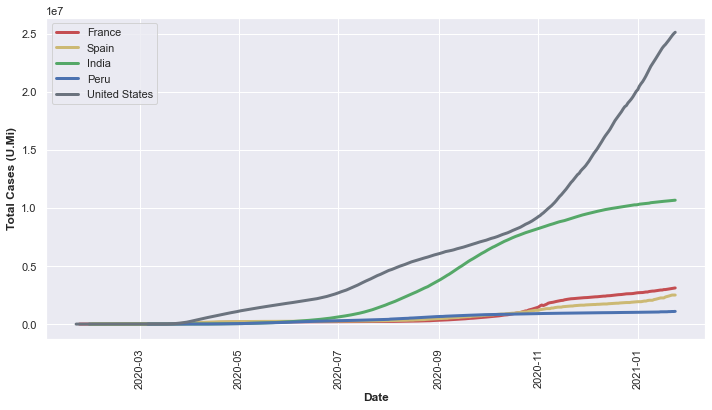

In [12]:
#@Mariacagi
count_l = ['France', 'Spain', 'India', 'Peru', 'United States']
vis.plot_def(df=data_final, row='total_cases', countr_list=count_l, ylab='Total Cases (U.Mi)')
vis.save_resources('Total_Cases')

### -total_cases_per_million

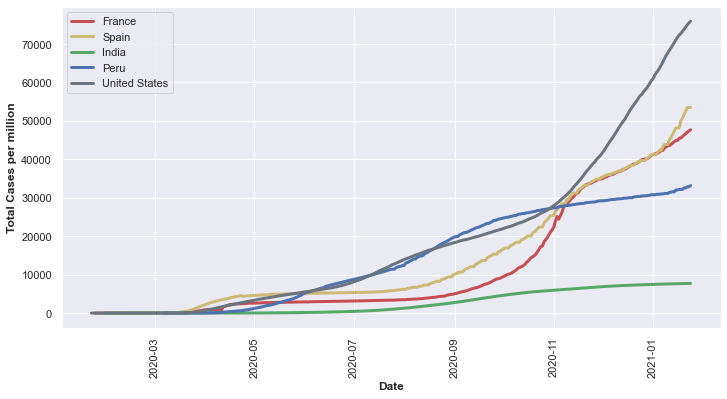

In [13]:
vis.plot_def(df=data_final, row='total_cases_per_million', countr_list=count_l, ylab='Total Cases per million')
vis.save_resources('Total_Cases_per_million')

### -life_expectancy

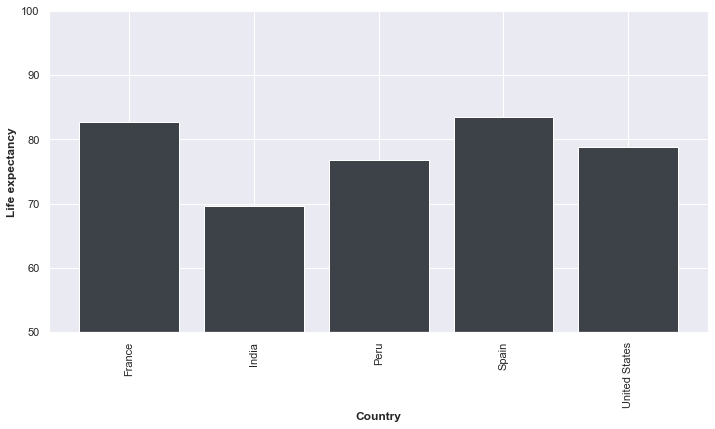

In [14]:
# @Mariacagi

# Seaborn Visualization
sns.set()

# Creating the graph
groupby_data = data_final.groupby("location").mean().sort_values(by="location")


plt.figure(figsize=(vis.cm_to_inch(30), vis.cm_to_inch(15)))
plt.ylim([50, 100])
plt.bar(x=groupby_data.index.values, height=groupby_data.life_expectancy, facecolor='#3d4248')

# Labels
plt.xlabel("Country", weight="bold")
plt.ylabel("Life expectancy", weight="bold")
plt.xticks(rotation="90")

# Saving the graph in a folder - ¿Cómo lo podemos guardar con una ruta que no cambie dependiendo del ordenador?
name_fig = "\\reports\\Life_Expectancy.png"

plt.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')

# Showing the graph
plt.show

vis.save_resources('Life_Expectancy')

### -new_cases_smoothed

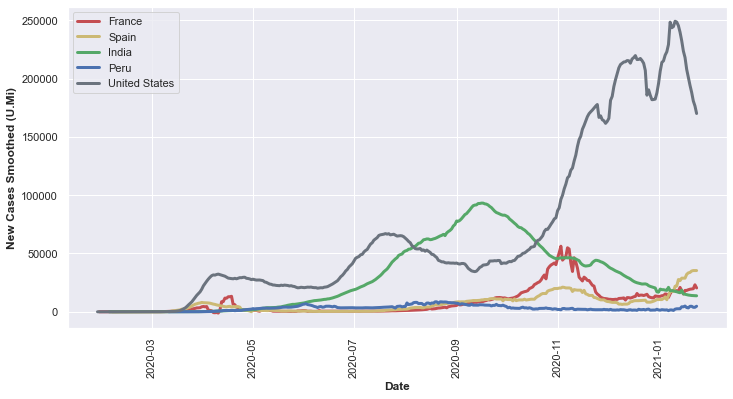

In [15]:
# @KapilDM
vis.plot_def(df=data_final, row='new_cases_smoothed', countr_list=count_l, ylab='New Cases Smoothed (U.Mi)')
vis.save_resources('New_Cases_Smoothed')

### -new_cases_smoothed_per_million

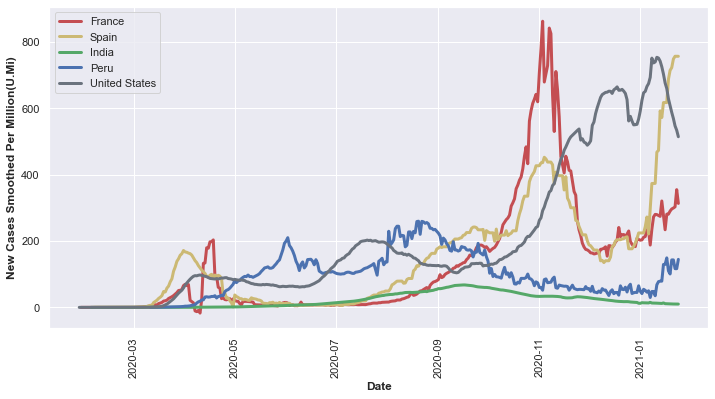

In [16]:
vis.plot_def(df=data_final, row='new_cases_smoothed_per_million', countr_list=count_l, ylab='New Cases Smoothed Per Million(U.Mi)')
vis.save_resources('New_Cases_Smoothed_Per_Million')

### -stringency_index

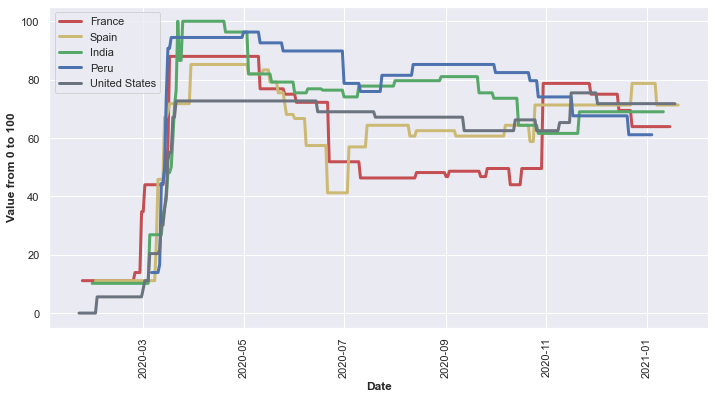

In [17]:
vis.plot_def(df=data_final, row='stringency_index', countr_list=count_l, ylab='Value from 0 to 100')
vis.save_resources('Stringency_Index')

### -new_deaths_smoothed

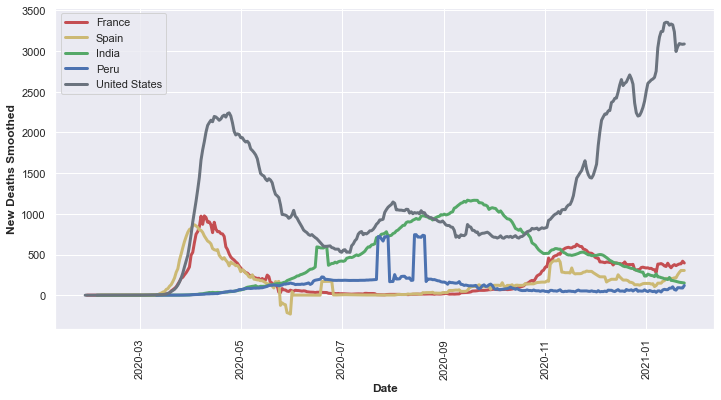

In [18]:
#@JaunIgciona
vis.plot_def(df=data_final, row='new_deaths_smoothed', countr_list=count_l, title=None, ylab='New Deaths Smoothed')
vis.save_resources('New_Deaths_Smoothed')

### -new_deaths_smoothed_per_million

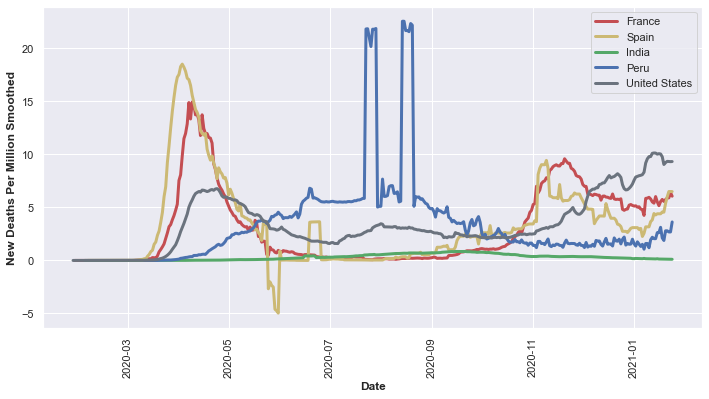

In [19]:
vis.plot_def(df=data_final, row='new_deaths_smoothed_per_million', countr_list=count_l, title=None, ylab='New Deaths Per Million Smoothed')
vis.save_resources('New_Deaths_Smoothed_Per_Million')

### -total_deaths

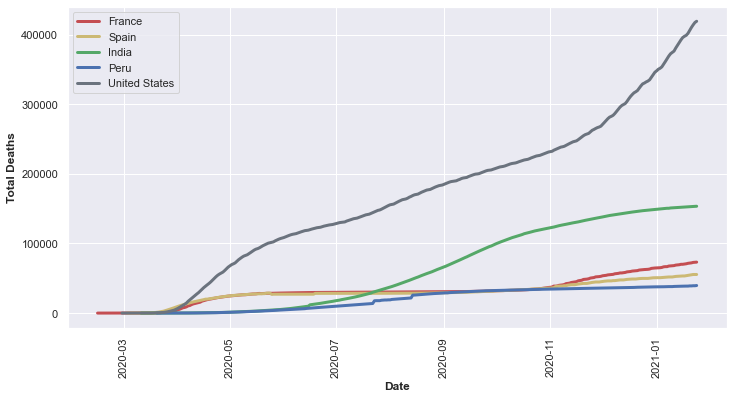

In [20]:
vis.plot_def(df=data_final, row='total_deaths', countr_list=count_l, title=None, ylab= 'Total Deaths')
vis.save_resources('Total_Deaths')

### -total_deaths_per_million

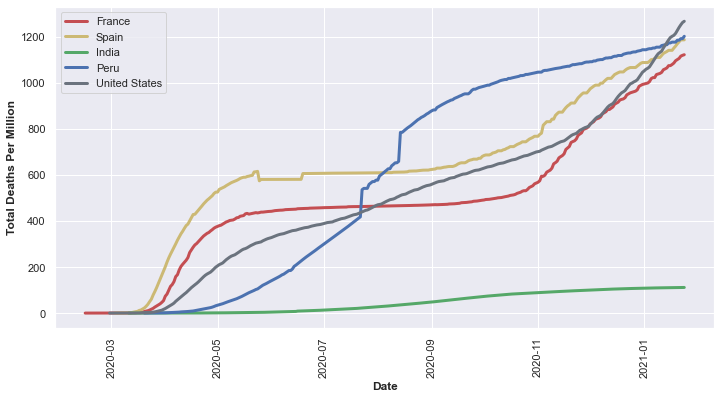

In [21]:
vis.plot_def(df=data_final, row='total_deaths_per_million', countr_list=count_l, title=None, ylab='Total Deaths Per Million')
vis.save_resources('Total_Deaths_Per_Million')

## Countries Alarm States

### -France

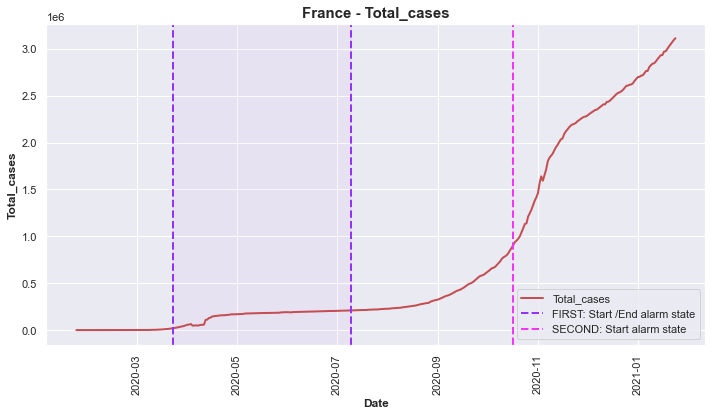

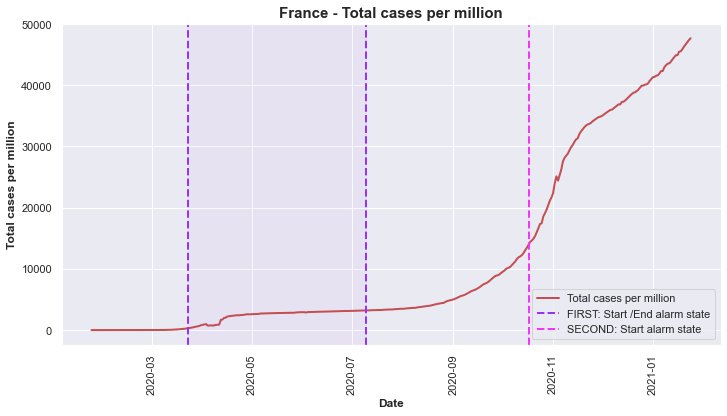

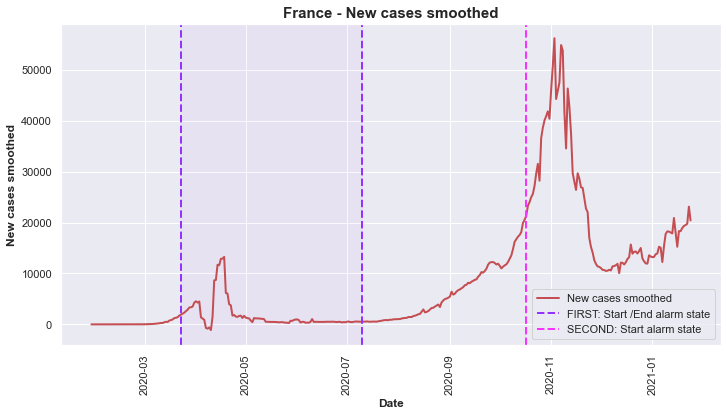

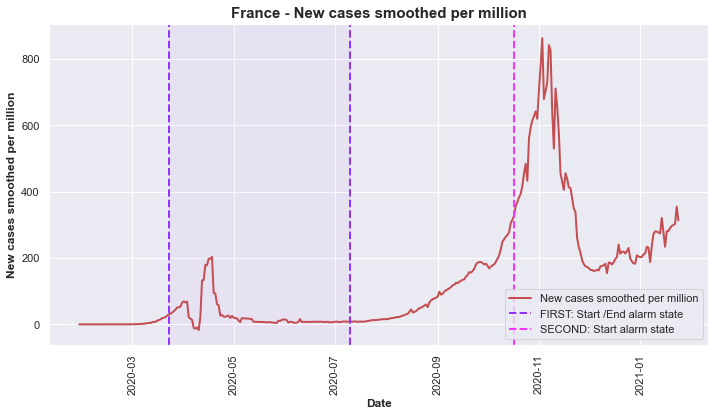

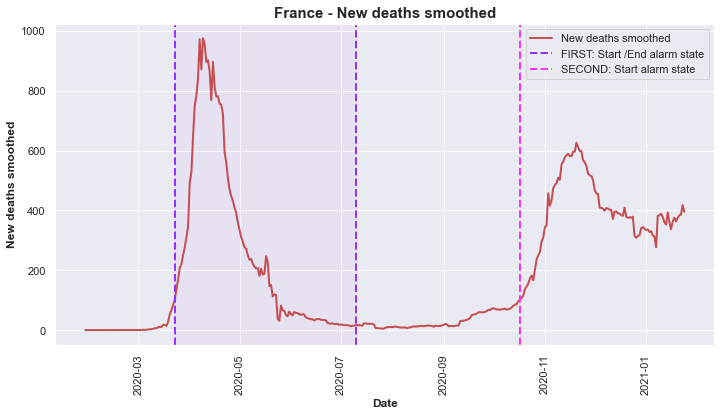

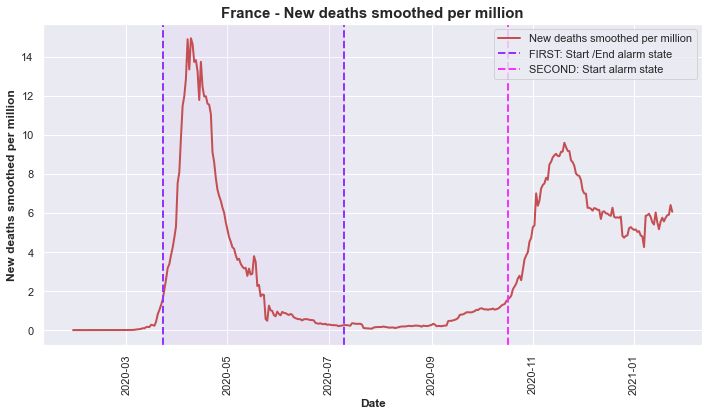

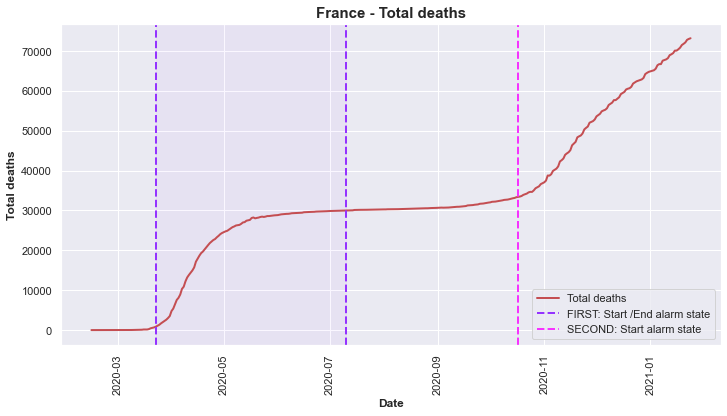

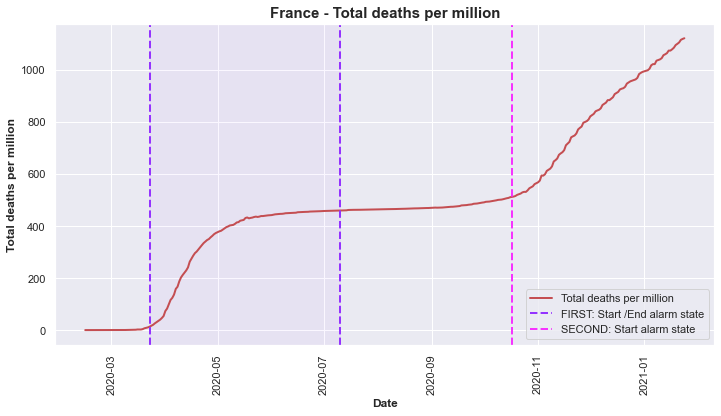

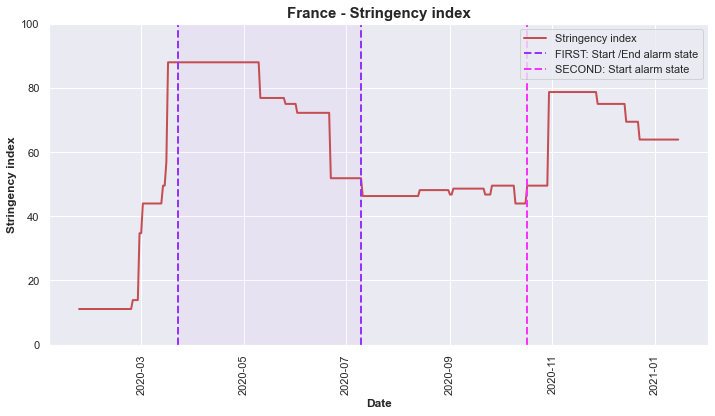

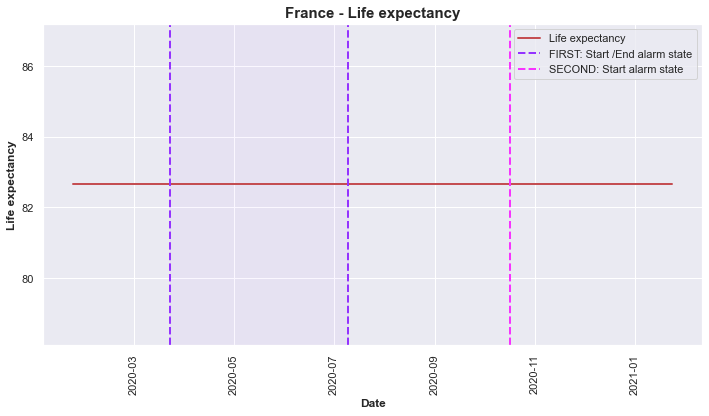

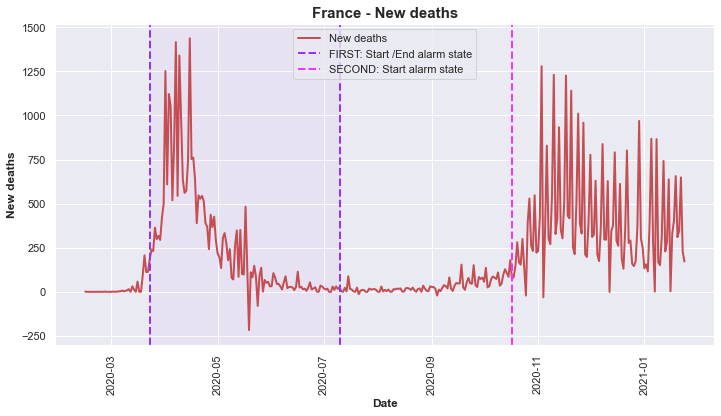

In [22]:
#France alarm state info: https://www.aa.com.tr/en/europe/france-extends-covid-19-state-of-emergency-to-feb-16/2032593 
vis.country_alarm_state_func(df=data_final,country="France")

### -Spain

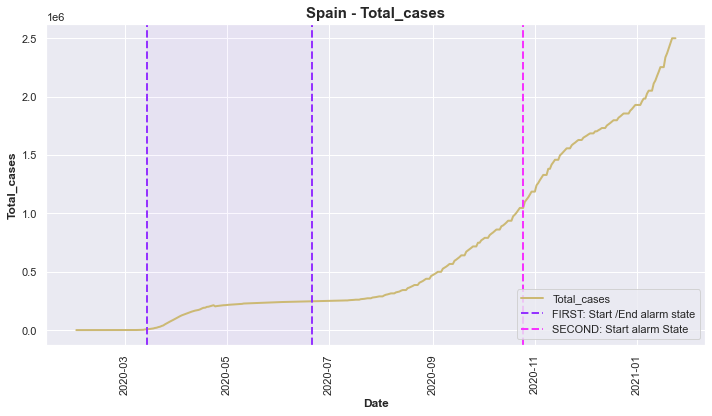

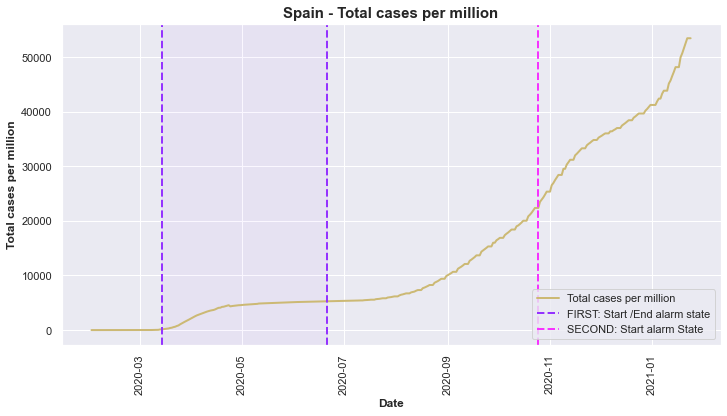

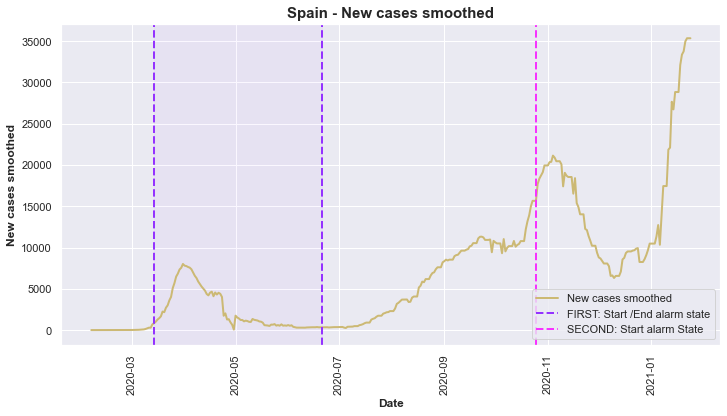

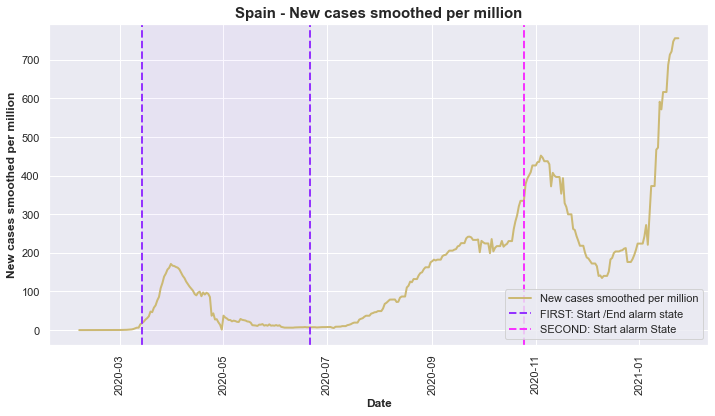

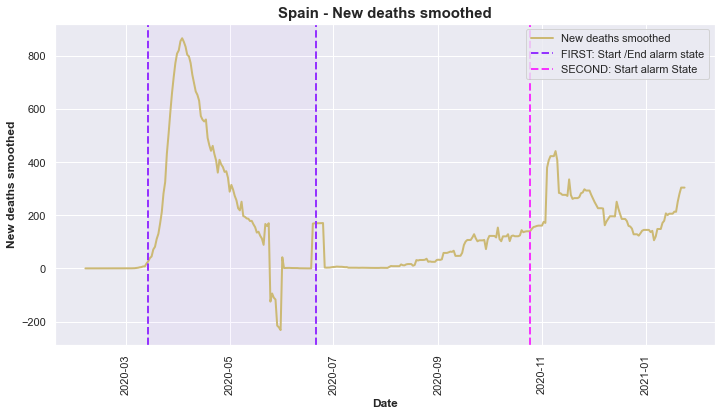

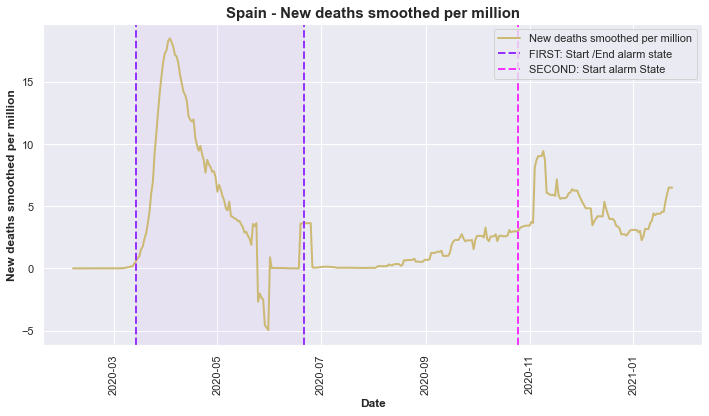

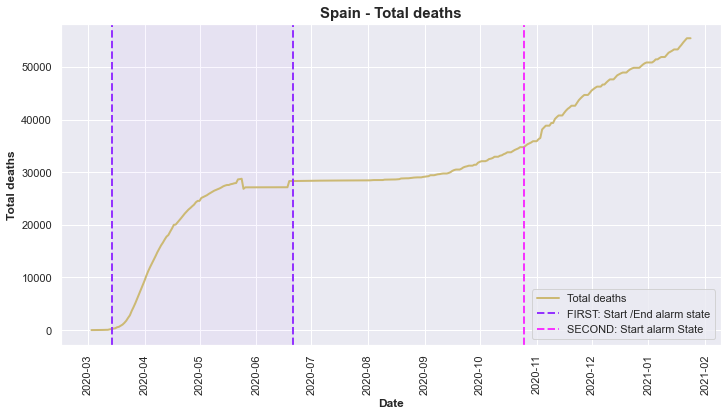

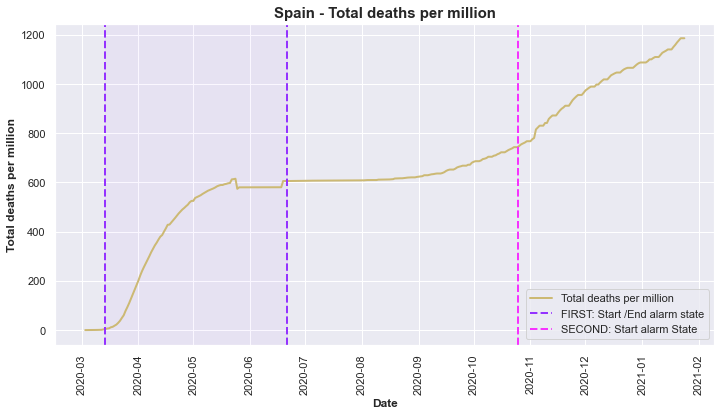

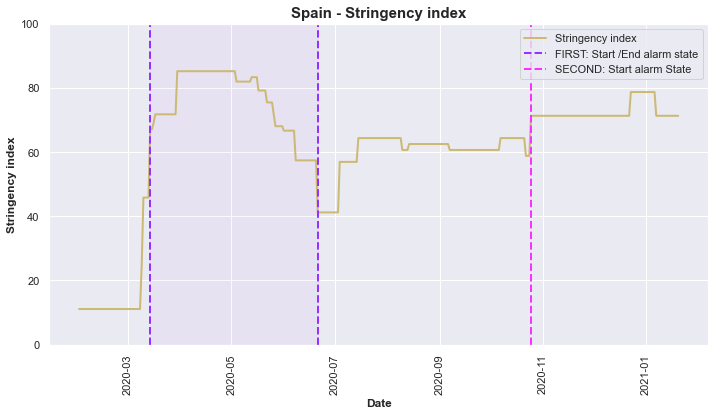

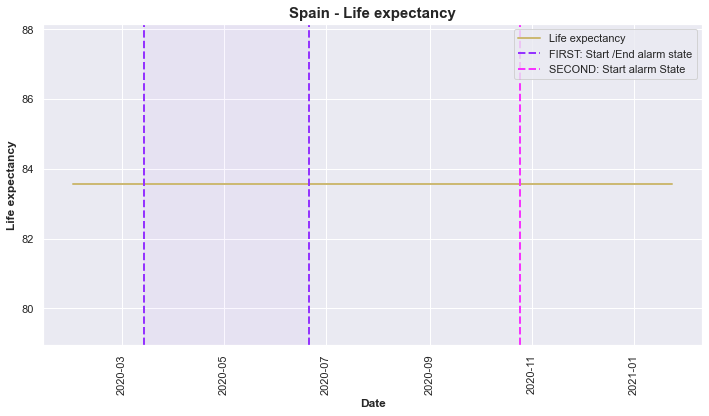

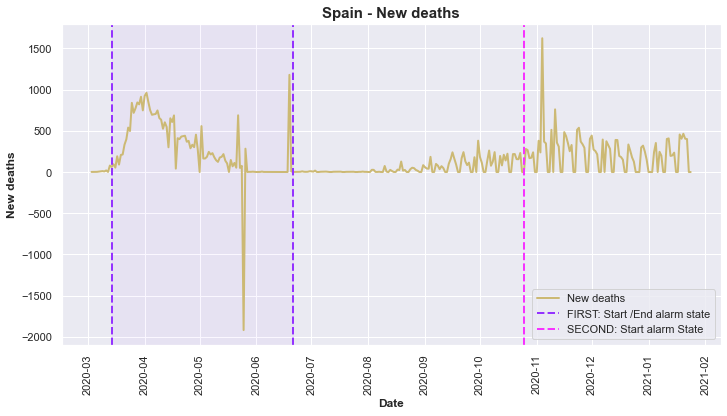

In [23]:
#Spain : https://www.lamoncloa.gob.es/covid-19/Paginas/estado-de-alarma.aspx
vis.country_alarm_state_func(df=data_final,country="Spain")

### -India

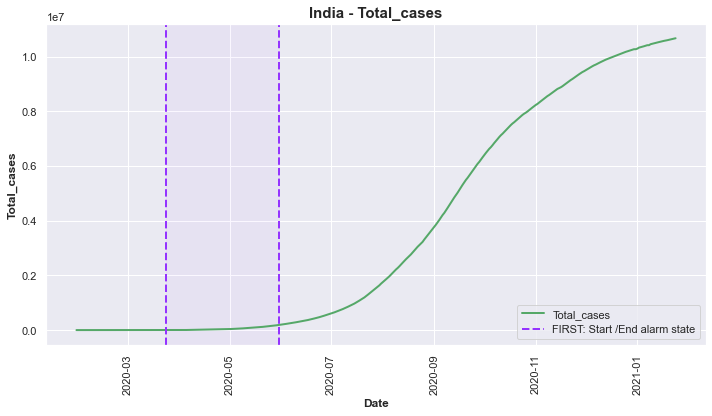

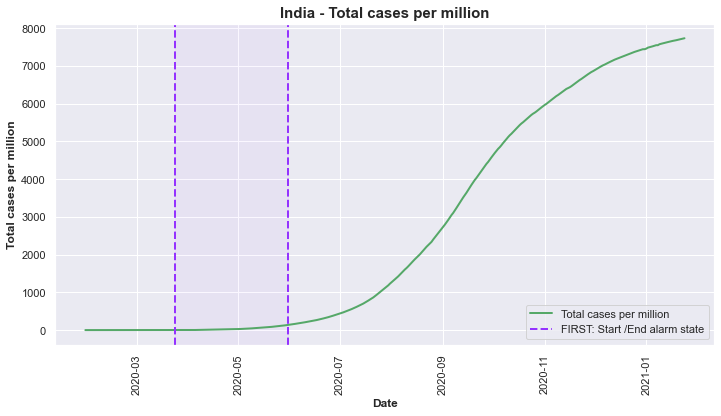

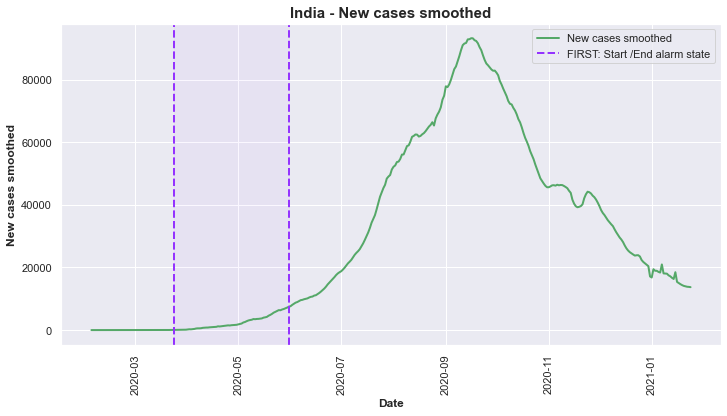

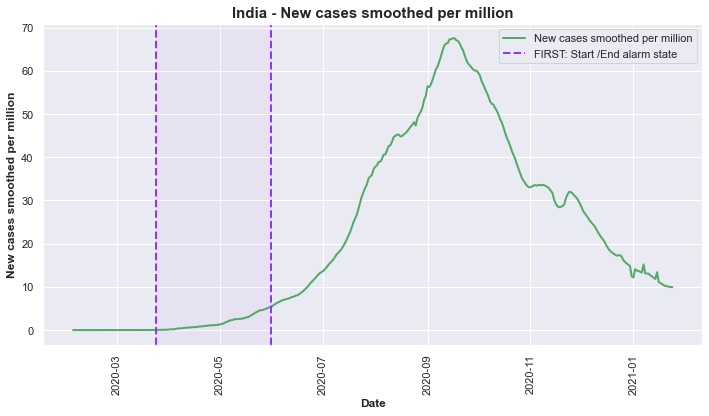

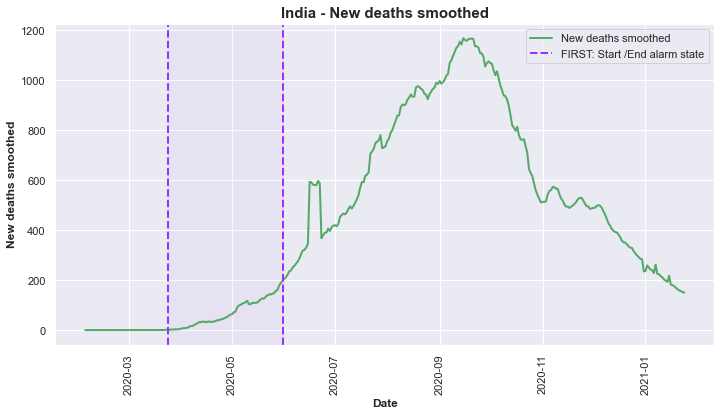

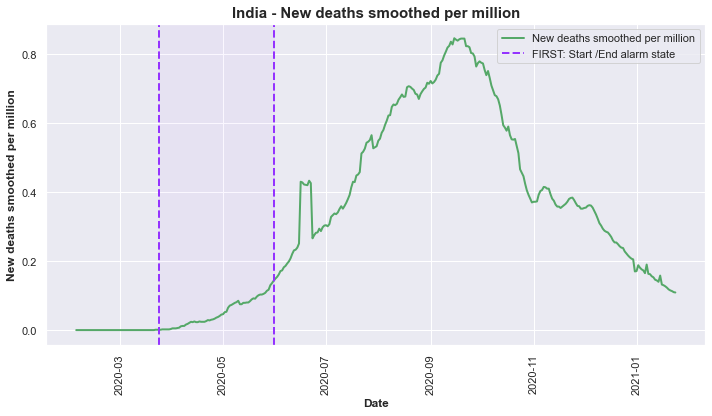

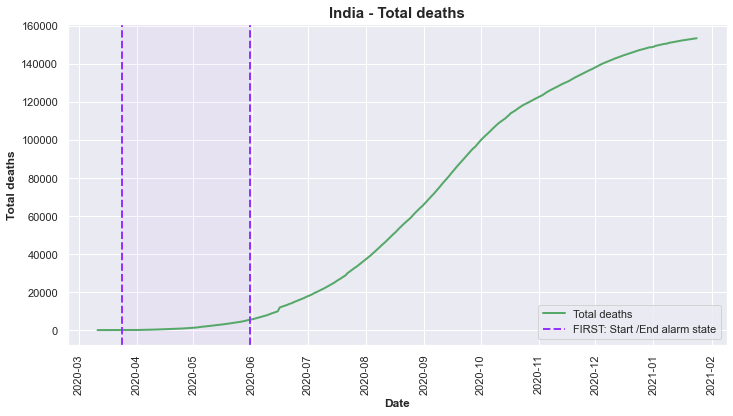

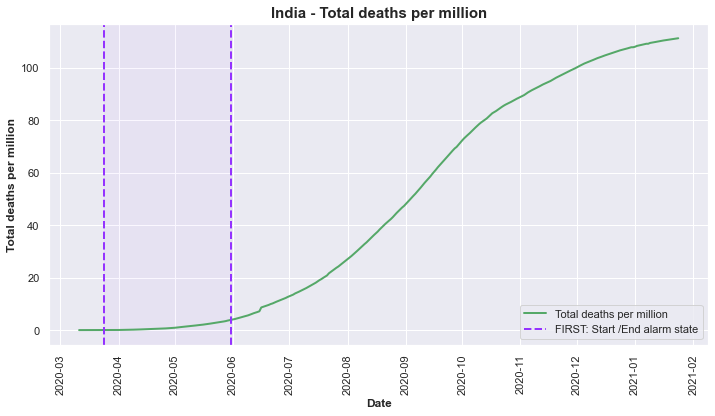

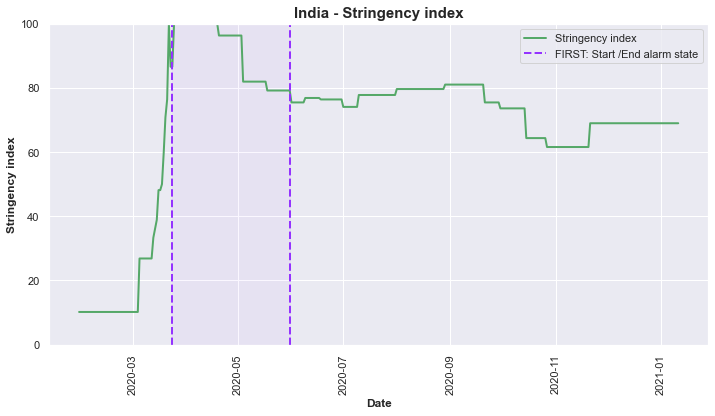

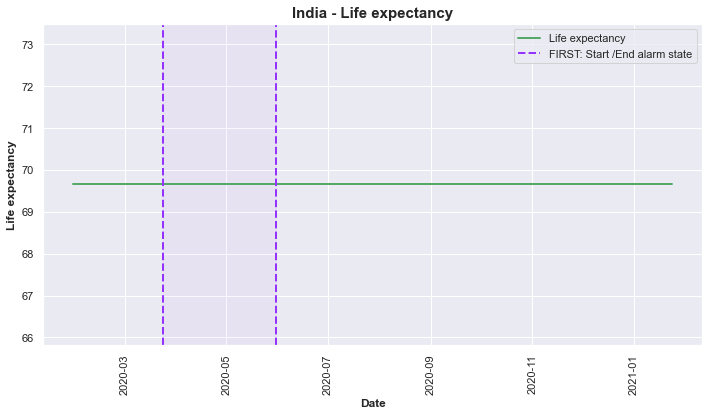

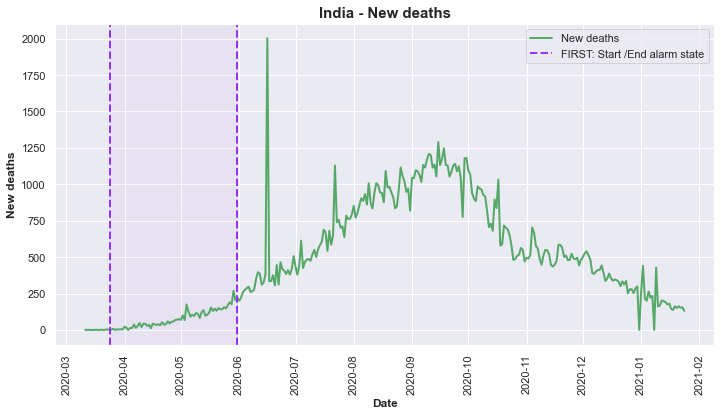

In [24]:
#India alarm state info: https://www.brookings.edu/blog/future-development/2020/07/02/how-well-is-india-responding-to-covid-19/
# https://www.indiatvnews.com/news/india/lockdown-unlock-in-india-covid19-pandemic-guidelines-restrictions-2020-coronavirus-lockdown-series-674925
vis.country_alarm_state_func(df=data_final,country="India")

### -Peru

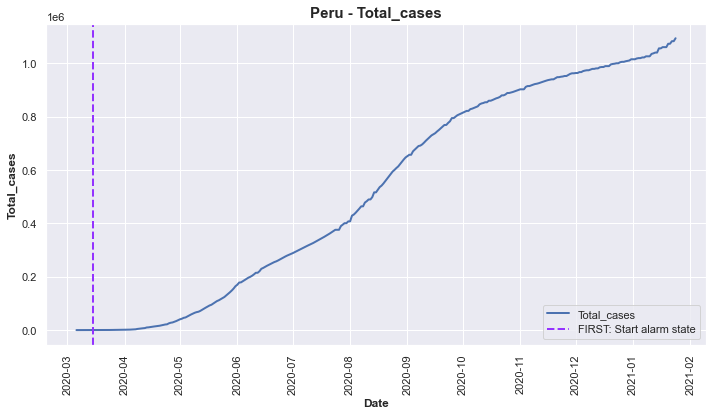

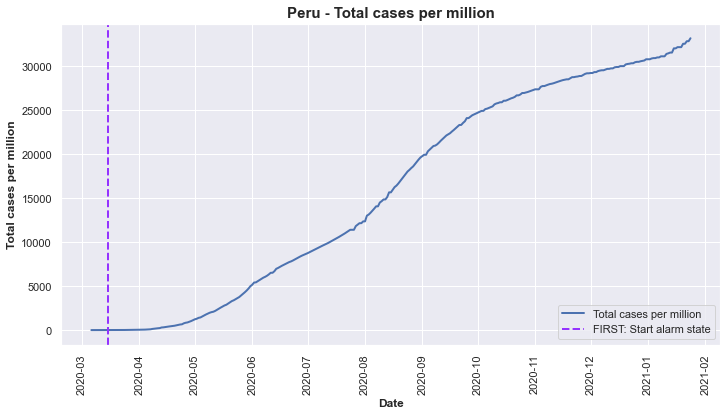

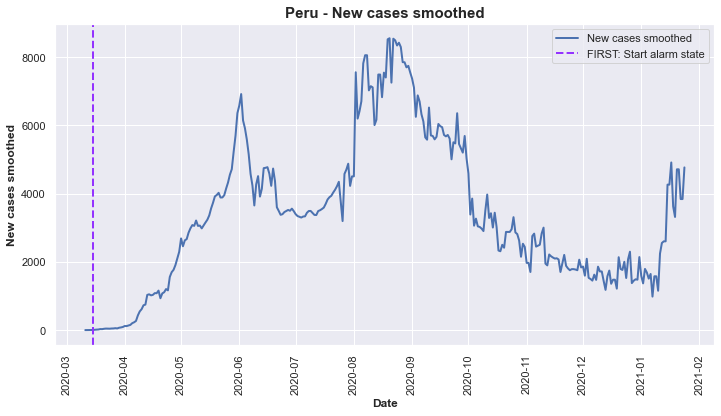

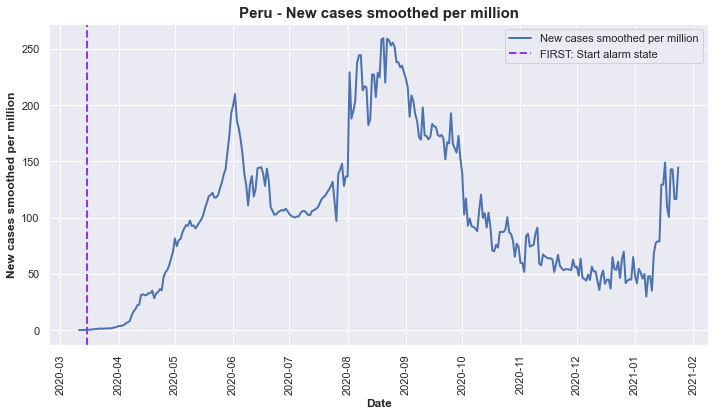

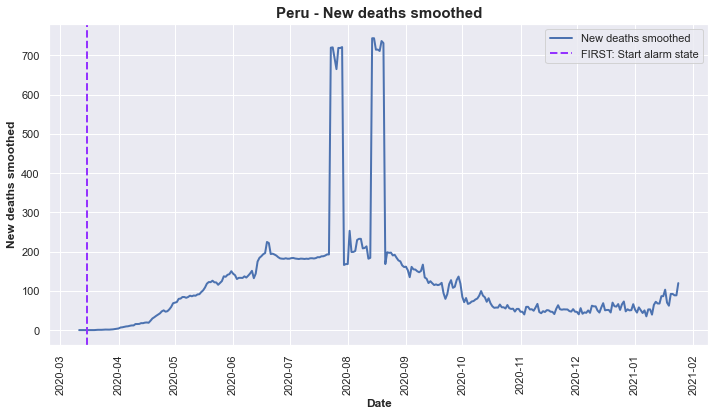

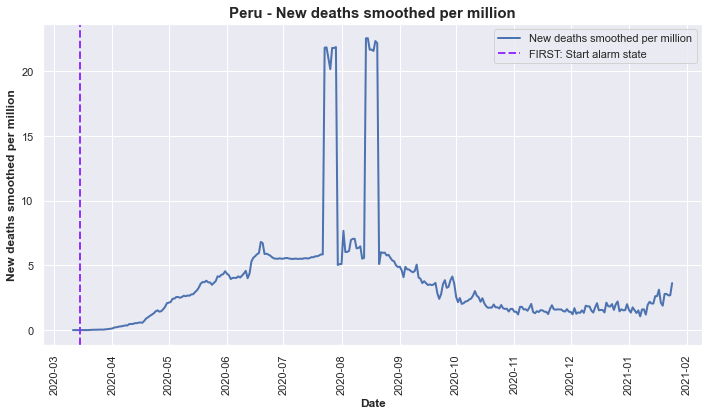

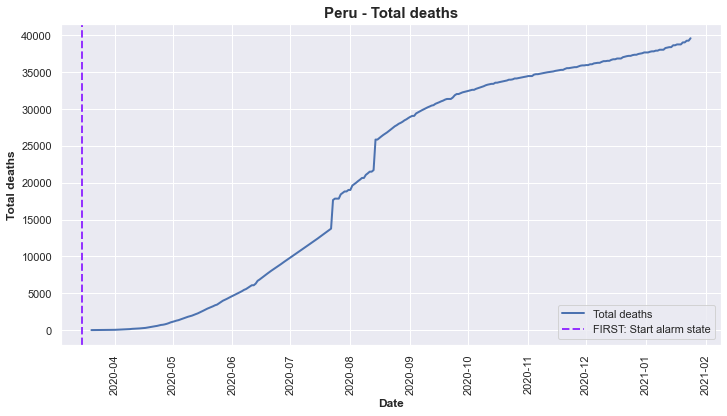

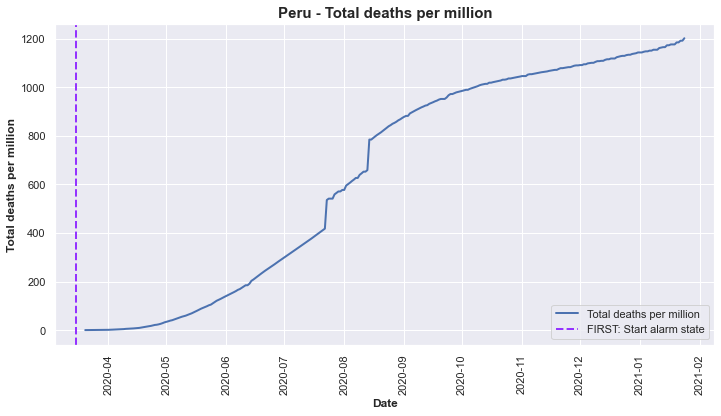

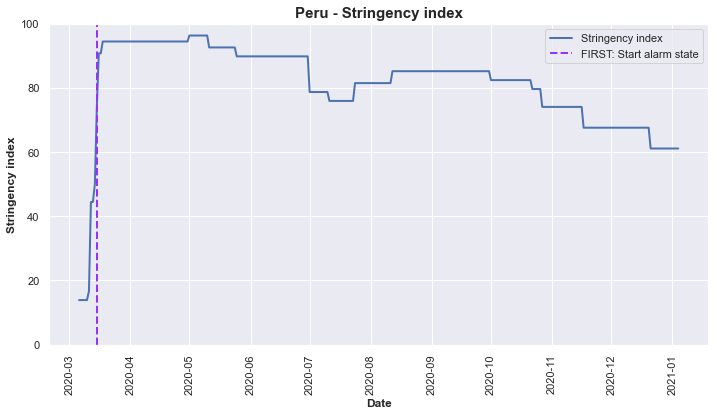

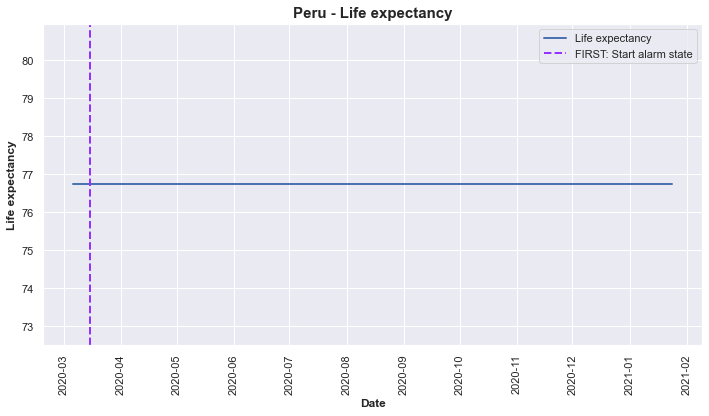

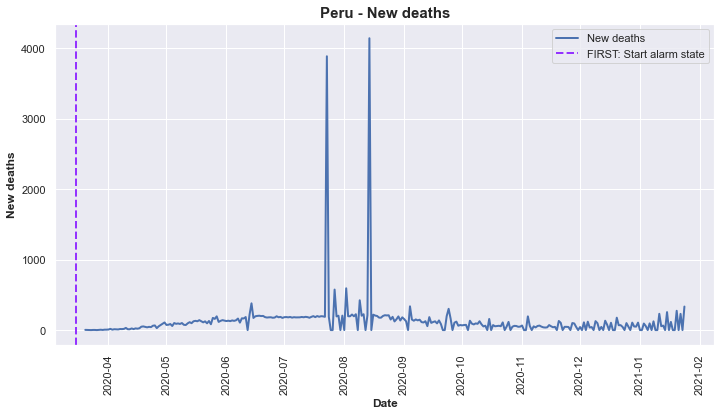

In [25]:
#Peru : https://www.gob.pe/8784-coronavirus-preguntas-y-respuestas-sobre-el-estado-de-emergencia
vis.country_alarm_state_func(df=data_final,country="Peru")

### -United States

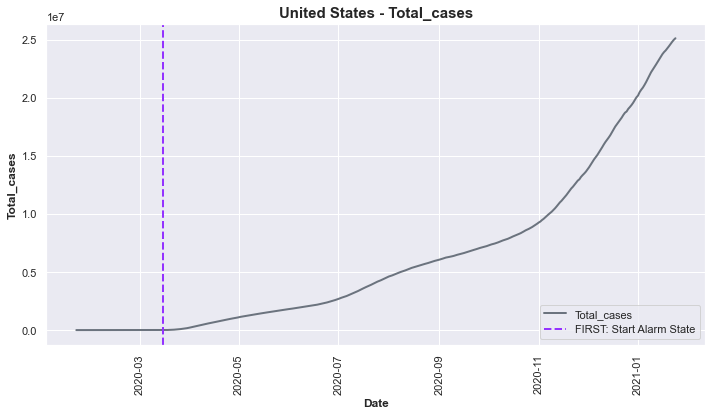

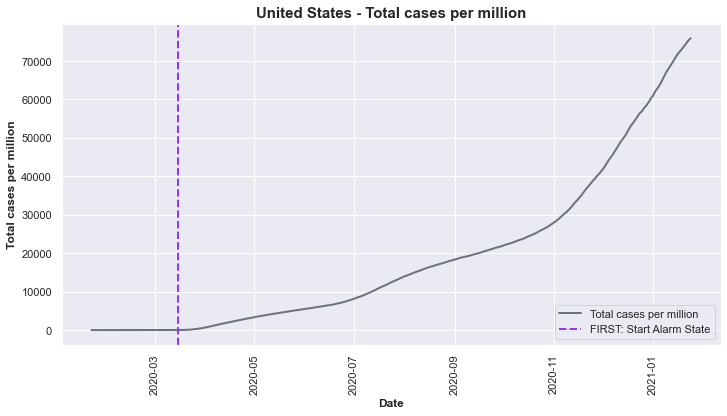

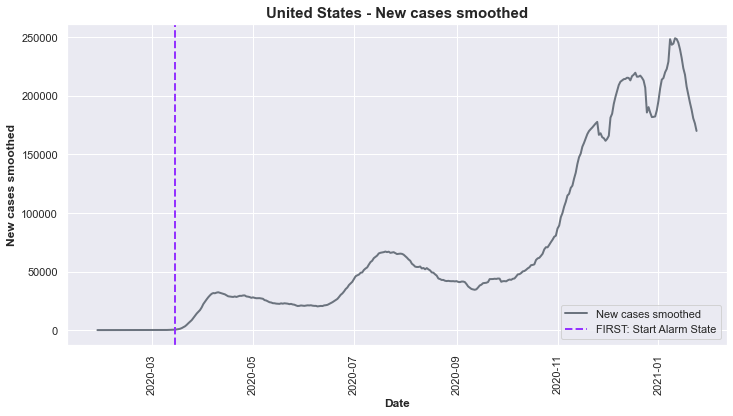

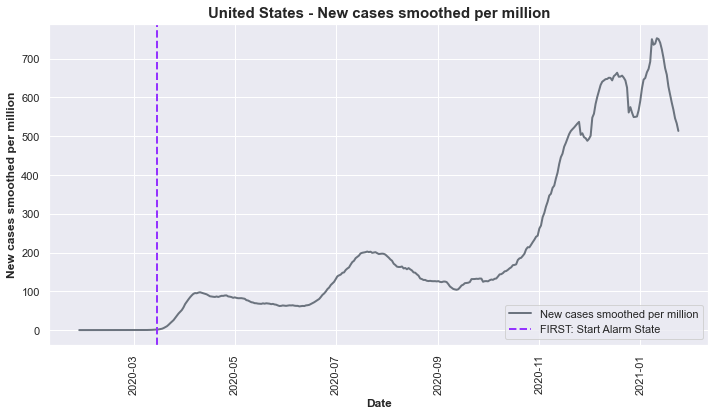

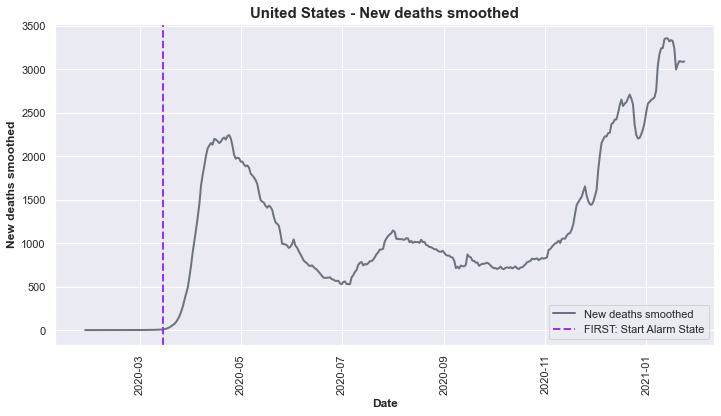

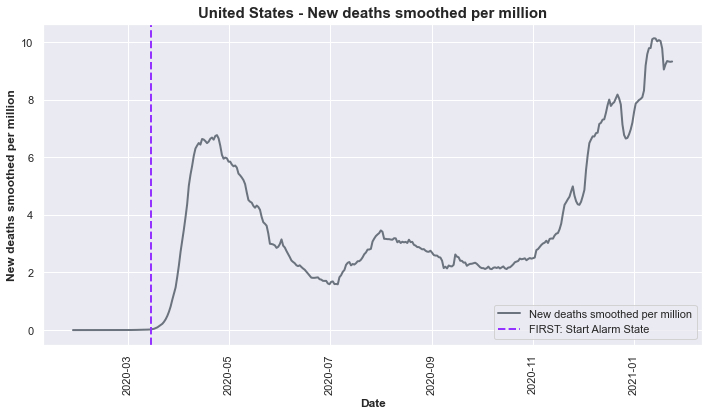

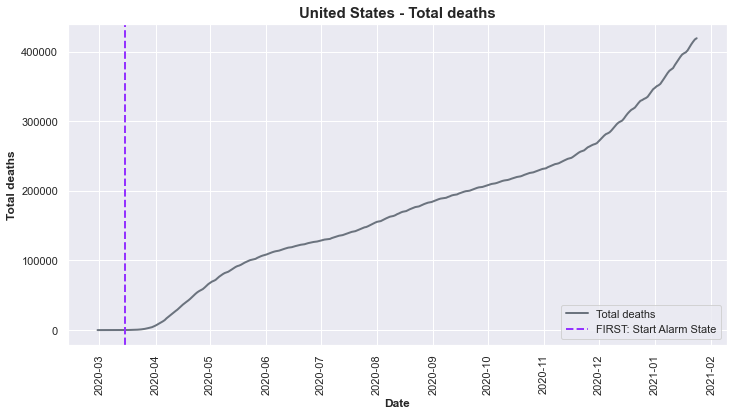

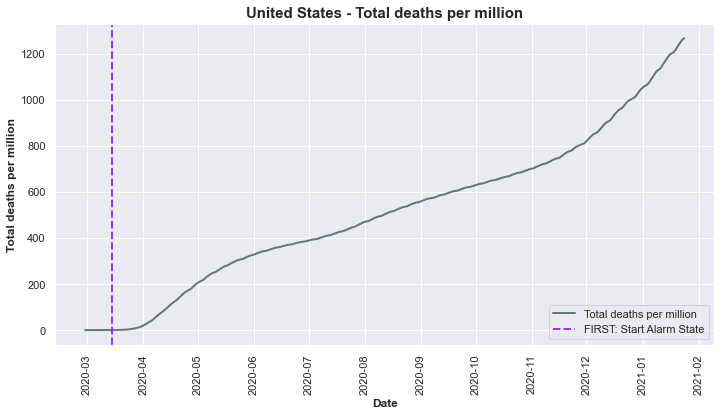

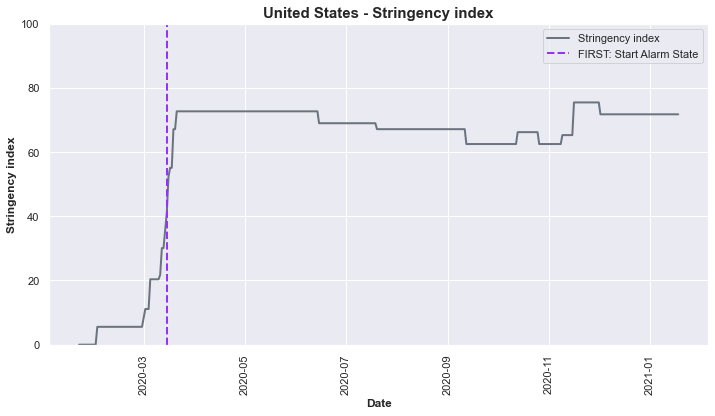

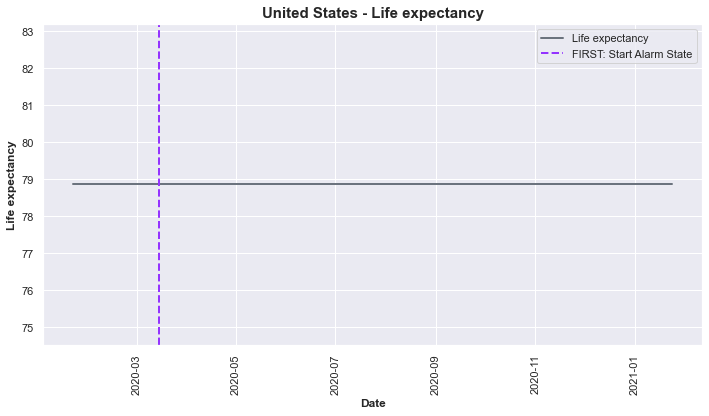

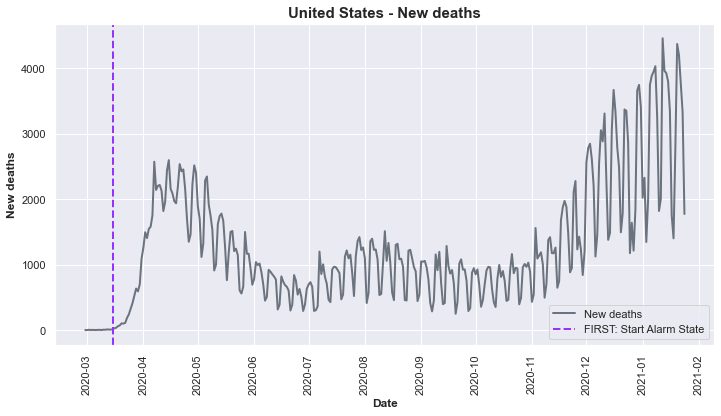

In [26]:
#United States alarm state info: https://en.wikipedia.org/wiki/List_of_national_emergencies_in_the_United_States
vis.country_alarm_state_func(df=data_final,country="United States")

## Correlation Matrix

total_cases  total_cases_per_million  \
total_cases                         1.000000                 0.573745   
total_cases_per_million             0.573745                 1.000000   
new_cases_smoothed                  0.880949                 0.548294   
new_cases_smoothed_per_million      0.533273                 0.782230   
new_deaths_smoothed                 0.733410                 0.420293   
new_deaths_smoothed_per_million     0.154537                 0.389474   
total_deaths                        0.945368                 0.573894   
total_deaths_per_million            0.204322                 0.849643   
life_expectancy                    -0.217882                 0.237055   
stringency_index                    0.101785                 0.181501   
new_deaths                          0.662843                 0.362305   

                                 new_cases_smoothed  \
total_cases                                0.880949   
total_cases_per_million                    0.548294   
new_cases_smoothed                         1.000000   
new_cases_smoothed_per_million             0.661045   
new_deaths_smoothed                        0.847006   
new_deaths_smoothed_per_million            0.222340   
total_deaths                               0.865356   
total_deaths_per_million                   0.187816   
life_expectancy                           -0.147283   
stringency_index                           0.120743   
new_deaths                                 0.780758   

                                 new_cases_smoothed_per_million  \
total_cases                                            0.533273   
total_cases_per_million                                0.782230   
new_cases_smoothed                                     0.661045   
new_cases_smoothed_per_million                         1.000000   
new_deaths_smoothed                                    0.517542   
new_deaths_smoothed_per_million                        0.489546   
total_deaths                                           0.530297   
total_deaths_per_million                               0.554268   
life_expectancy                                        0.281910   
stringency_index                                       0.169951   
new_deaths                                             0.468694   

                                 new_deaths_smoothed  \
total_cases                                 0.733410   
total_cases_per_million                     0.420293   
new_cases_smoothed                          0.847006   
new_cases_smoothed_per_million              0.517542   
new_deaths_smoothed                         1.000000   
new_deaths_smoothed_per_million             0.442434   
total_deaths                                0.749858   
total_deaths_per_million                    0.080416   
life_expectancy                            -0.112233   
stringency_index                            0.219689   
new_deaths                                  0.910438   

                                 new_deaths_smoothed_per_million  \
total_cases                                             0.154537   
total_cases_per_million                                 0.389474   
new_cases_smoothed                                      0.222340   
new_cases_smoothed_per_million                          0.489546   
new_deaths_smoothed                                     0.442434   
new_deaths_smoothed_per_million                         1.000000   
total_deaths                                            0.138159   
total_deaths_per_million                                0.298186   
life_expectancy                                         0.280536   
stringency_index                                        0.358702   
new_deaths                                              0.379467   

                                 total_deaths  total_deaths_per_million  \
total_cases                          0.945368                  0.204322   
total_cases_per_million              0.573894     

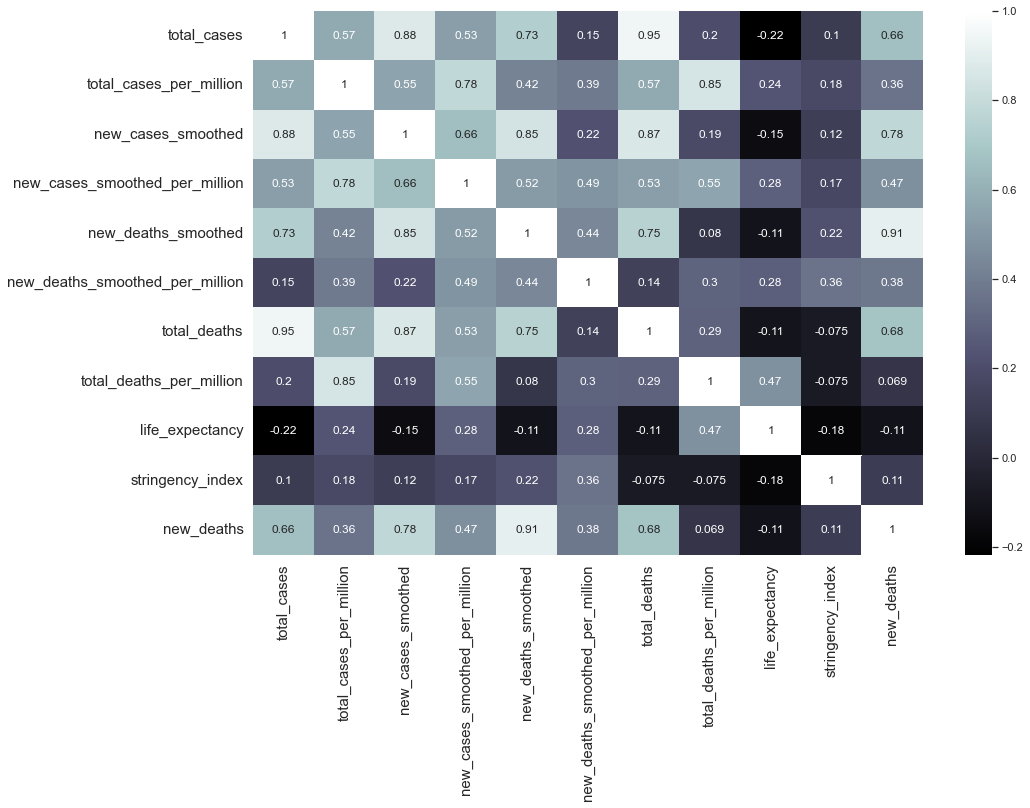

In [27]:
# Creating the graph
plt.figure(figsize=(15,10))
correlation_covid = data_final.corr()
heatmap_covid = sns.heatmap(correlation_covid, cmap="bone",annot=True)
fig_corr_covid = heatmap_covid.get_figure()

# Labels
plt.yticks(va="center", rotation = 0, fontsize=15)
plt.xticks(fontsize=15)

# Showing the chart
correlation_covid

In [28]:
#Saving the correlation matrix 
name_fig = "\\reports\\Correlation_matrix_covid_dataset_Bgroup.png"

fig_corr_covid.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')

## Imported json

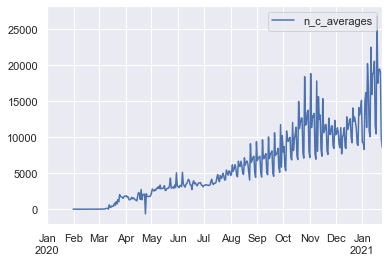

In [35]:
imported_json = pd.read_json(root_path + r'/data/n_c_averages.json')
sns.set()
imported_json.plot()
vis.save_resources('json_A_Group')

In [30]:
imported_json

n_c_averages
2020-01-01           NaN
2020-01-02           NaN
2020-01-03           NaN
2020-01-04           NaN
2020-01-05           NaN
...                  ...
2021-01-20       19198.2
2021-01-21       19406.0
2021-01-22       18970.4
2021-01-23        9815.8
2021-01-24        8562.0

[390 rows x 1 columns]

<Figure size 432x288 with 0 Axes>